In [ ]:
def add_gaussian_noise(image, mean=0, std=10):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

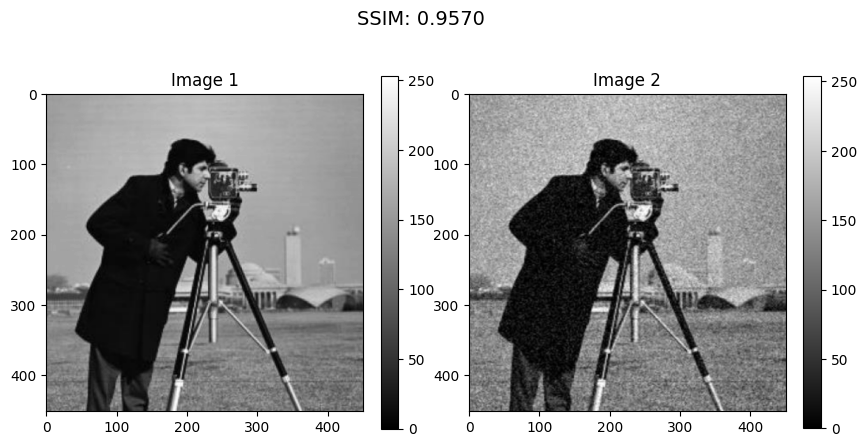

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def SSIM(image1, image2, c1=0.065, c2=0.065):

    # Compute mean of images
    mean_x = np.mean(image1)
    mean_y = np.mean(image2)

    # Compute covariance and variances
    cov_xy = np.mean((image1 - mean_x) * (image2 - mean_y))
    var_x = np.var(image1)
    var_y = np.var(image2)

    # Compute SSIM
    num = (2 * mean_x * mean_y + c1) * (2 * cov_xy + c2)
    den = (mean_x**2 + mean_y**2 + c1) * (var_x + var_y + c2)
    ssim_index = num / den

    return ssim_index

# Example usage
image1 = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE).astype(np.float32)
#image2 = 255 - image1
image2 = cv2.imread('cameramanNoisy.png',cv2.IMREAD_GRAYSCALE).astype(np.float32)

image1 = cv2.resize(image1, (451, 451))

image2 = cv2.resize(image2, (451, 451))

ssim_score = SSIM(image1, image2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display image 1
im1 = axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Image 1')
fig.colorbar(im1, ax=axes[0], orientation='vertical', fraction=0.05)

# Display image 2
im2 = axes[1].imshow(image2, cmap='gray')
axes[1].set_title('Image 2')
fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.05)

plt.suptitle(f'SSIM: {ssim_score:.4f}', fontsize=14)
plt.show()


17.97590949006374


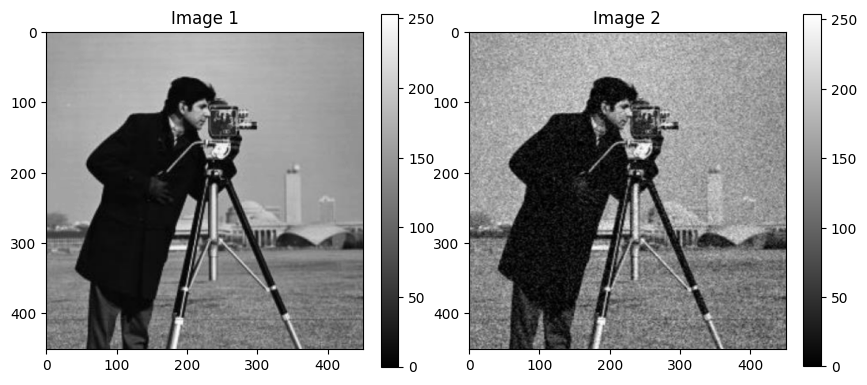

In [ ]:

def calculate_rmsd(image1, image2):

    squared_diff_sum = 0.0

    # Iterate through pixels and compute squared differences
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            squared_diff_sum += (image1[i, j] - image2[i, j]) ** 2

    # Compute mean squared difference
    mean_squared_diff = squared_diff_sum / (image1.shape[0] * image1.shape[1])

    # Compute RMSD
    rmsd = np.sqrt(mean_squared_diff)

    return rmsd


# Calculate RMSD between the images
rmsd_value = calculate_rmsd(image1, image2)

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display image 1
im1 = axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Image 1')
fig.colorbar(im1, ax=axes[0], orientation='vertical', fraction=0.05)

# Display image 2
im2 = axes[1].imshow(image2, cmap='gray')
axes[1].set_title('Image 2')
fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.05)

print(rmsd_value)
plt.show()
